In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

path="/its/home/drs25/Documents/GitHub/RoboSkin/Code/NewRigExperiments/"
datapath="/its/home/drs25/Documents/data/Tactile Dataset/datasets/"
if os.name == 'nt':
    path="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/"
    datapath="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/texture-tactip/"

## load data set

In [19]:
data = np.load(datapath+"X_data_presstip.npz") #load data
X=None
for array_name in data:
    X=data[array_name]
X=(X* 3.3) / 65536 #convert to voltage
data = np.load(datapath+"y_data_presstip.npz") #load data
y=None
for array_name in data:
    y=data[array_name]
print(X.shape,y.shape)

(200, 20, 16) (200,)


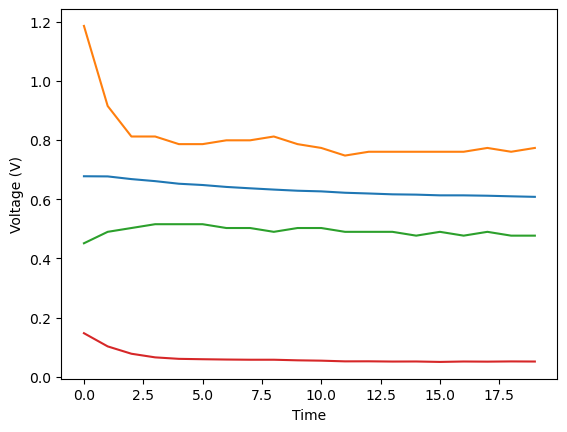

In [26]:
std=np.std(X,axis=0)
av=np.average(X,axis=0)
ma=np.max(X,axis=0)
mi=np.min(X,axis=0)
plt.plot(av[:,8])
plt.plot(ma[:,8])
plt.plot(mi[:,8])
plt.plot(std[:,8])
plt.ylabel("Voltage (V)")
plt.xlabel("Time")
plt.show()



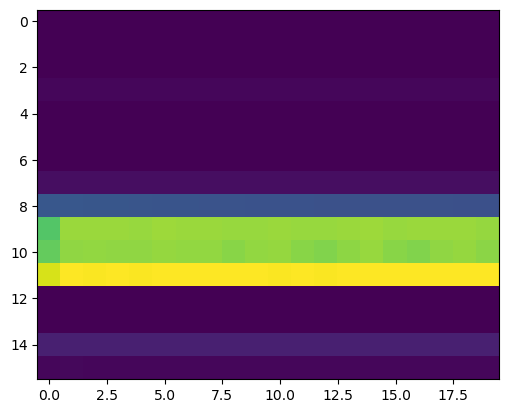

In [18]:
plt.imshow(av.T)
plt.xlabel("")
plt.show()

## plot sensor

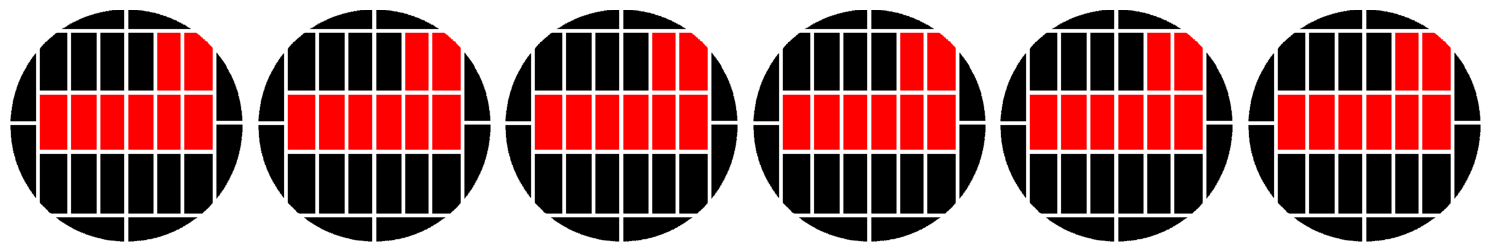

In [13]:
def visualise_pressues(channels):
    img = cv2.imread('/its/home/drs25/Pictures/pressTip/demonstrate.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dictionary={0:(0,189,230),1:(230,211,0),2:(230,0,227),3:(30,108,12),4:(230,0,0),6:(0,20,101),5:(121,36,116),6:(0,20,101),7:(229,112,112),8:(-1,-1,-1),9:(-1,-1,-1),10:(-1,-1,-1),11:(-1,-1,-1),12:(121,78,36),13:(0,45,230),14:(230,83,0),15:(112,229,122)}
    copied=np.zeros_like(img)
    mask = np.all(img == (0,0,0), axis=-1)
    copied[mask]=(255,255,255)
    for i in range(0,len(channels)):
        assert dictionary[i] in img or dictionary[i] == (-1,-1,-1), "Colour not in image:"+str(dictionary[i]) #check that the colour is in the correct format
        mask = np.all(img == dictionary[i], axis=-1)
        copied[mask]=(min(255,int(channels[i]*255)),0,0)
        #print((min(255,int(channels[i]*255)),0,0))
    mask = np.any((copied<110) & (copied>0), axis=-1)
    copied[mask,0]+=60
    copied[copied>255]=255
    copied[copied<0]=0

    return copied

fig, axes = plt.subplots(1, 6, figsize=(15, 10))
axes = axes.flatten()
for i in range(6):
    im=axes[i].imshow(visualise_pressues(av[i]),cmap="cividis")
    axes[i].axis("off")
plt.tight_layout()